In [1]:
c_orange_d = '#FF5722'
c_orange = '#FF9800'
c_red = '#D32F2F'
c_green_d = '#388E3C'
c_green = '#4CAF50'
c_blue_d = '#303F9F'
c_blue_l = '#2196F3'
c_teal_d = '#00796B'
c_purple = '#9C27B0'
c_purple_d = '#512DA8'
c_yellow_d = '#FFA000'
c_yellow = '#FFC107'
c_grey = '#607D8B'
c_grey_d = '#455A64'

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('white')
sns.set_context("poster")

In [3]:
df = pd.read_hdf('elite_sens_2.h5', 'table')
df.head()

,trf_count,tmp_271,str_229,str_134,disp_204,pressure_2753,weather_9001,weather_9011,weather_9002,weather_9012
timestamp,,,,,,,,,,
2016-03-01 00:00:00,NaN,15.772068,-703.685852,-1.22429,267.0557,NaN,NaN,NaN,NaN,NaN
2016-03-01 00:01:00,NaN,15.853798,-679.604295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01 00:02:00,NaN,16.004606,-730.029733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01 00:03:00,NaN,16.040288,-724.782943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01 00:04:00,NaN,15.949598,-710.251874,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,trf_count,tmp_271,str_229,str_134,disp_204,pressure_2753,weather_9001,weather_9011,weather_9002,weather_9012
timestamp,,,,,,,,,,
2017-09-30 23:55:00,NaN,23.040722,NaN,NaN,NaN,-118.556412,NaN,NaN,NaN,NaN
2017-09-30 23:56:00,NaN,23.001648,NaN,NaN,NaN,-117.931050,NaN,NaN,NaN,NaN
2017-09-30 23:57:00,NaN,23.022498,NaN,NaN,NaN,-119.222387,NaN,NaN,NaN,NaN
2017-09-30 23:58:00,NaN,23.007362,NaN,NaN,NaN,-119.717308,NaN,NaN,NaN,NaN
2017-09-30 23:59:00,NaN,22.984698,NaN,NaN,NaN,-117.707061,NaN,NaN,NaN,NaN


In [5]:
a = df['str_229']

In [6]:
import matplotlib.dates as dates

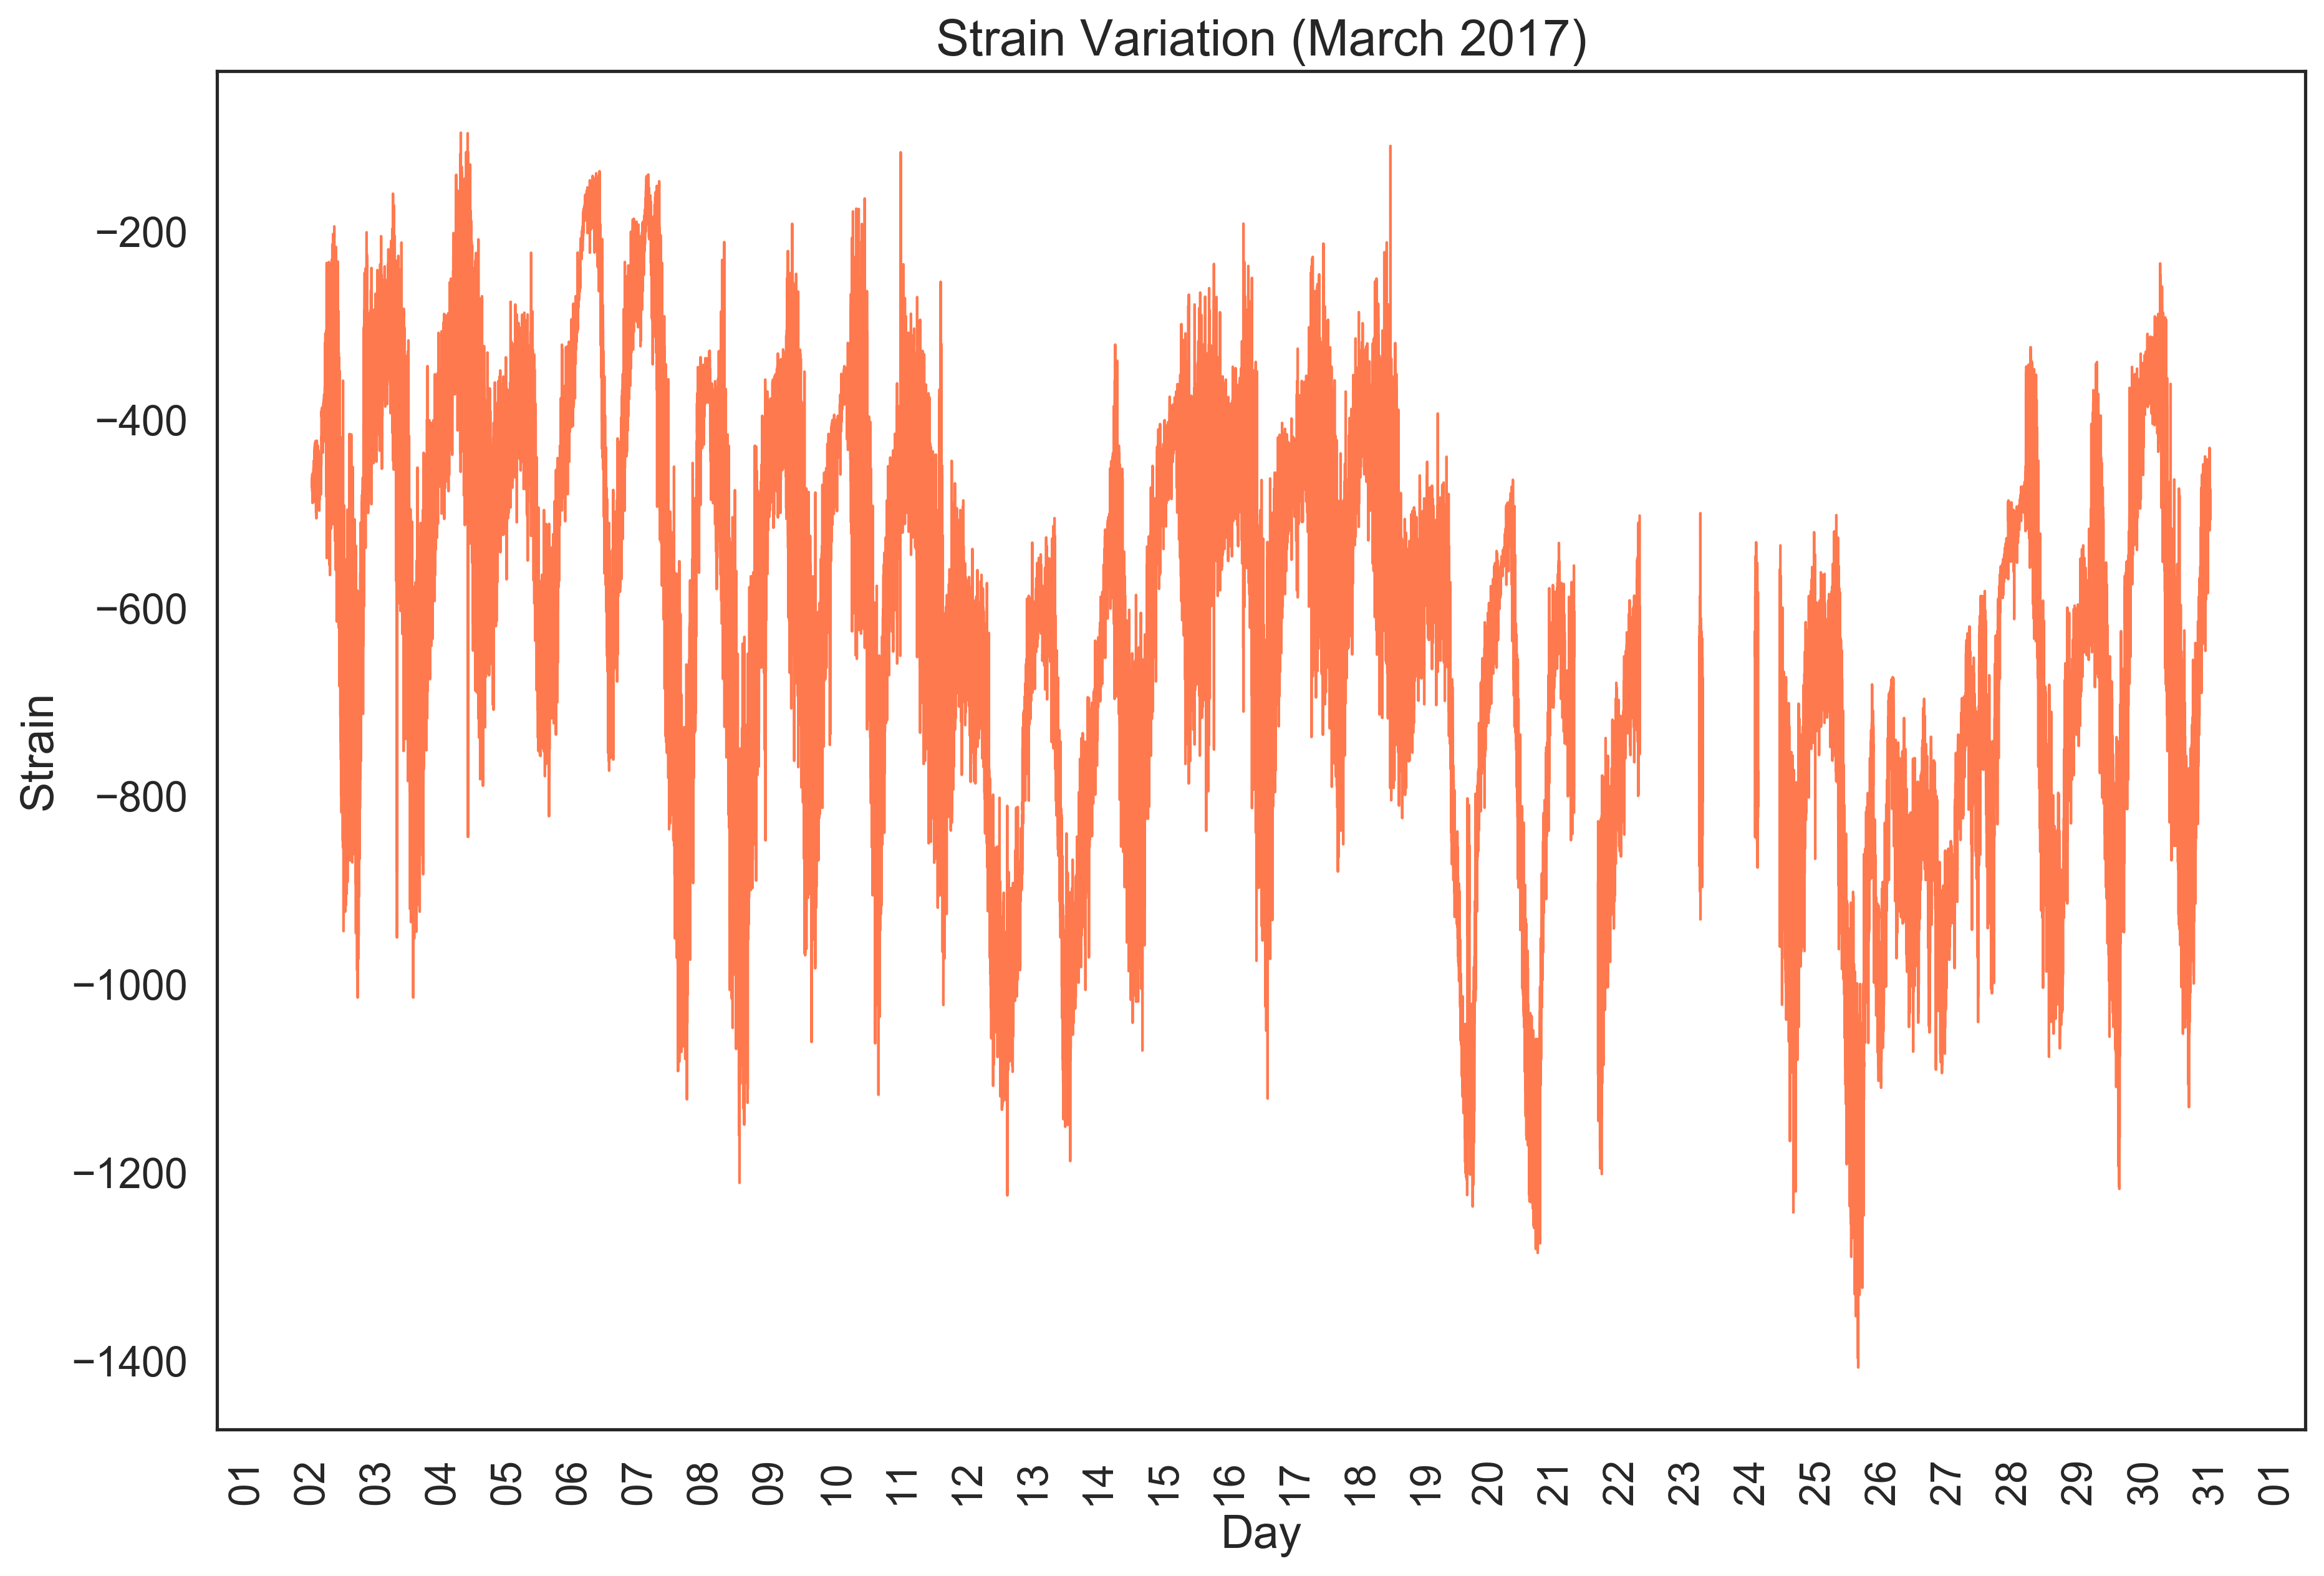

In [24]:
d = a.loc['2016-03-02':'2016-03-30']

sns.set_style('white')
plt.figure(dpi=300)
plt.plot(d, linewidth=1, c=c_orange_d, alpha=0.8)
plt.title('Strain Variation (March 2017)')
plt.xticks(rotation='vertical')
plt.ylabel('Strain')
plt.xlabel('Day')
plt.gca().xaxis.set_major_locator(dates.DayLocator())
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d'))
plt.tight_layout()
plt.savefig('sg-var.png')

# DO FFT

In [8]:
d = d.dropna()

In [9]:
signal = d.values
Fs = 1/60
n = len(d.index)
print('n: {}'.format(n))
k = np.arange(n)
T = n/Fs
frq = k/T
frq = frq[range(int(n/2))]
Y = np.fft.fft(signal)/n
Y = Y[range(int(n/2))]

n: 38272


In [10]:
frq

array([  0.00000000e+00,   4.35479376e-07,   8.70958751e-07, ...,
         8.33202690e-03,   8.33246237e-03,   8.33289785e-03])

In [11]:
signal

array([-472.02961217, -469.8256435 , -462.21420983, ..., -499.05202033,
       -496.12876583, -484.50749423])

In [12]:
Y

array([ -6.16623111e+02 +0.00000000e+00j,
         1.50614867e+01 -5.97508786e+01j,
         2.91743513e+01 -5.49144160e+01j, ...,
        -6.59906997e-02 +1.75437897e-01j,
        -5.74918499e-01 -4.52094643e-02j,   4.25836775e-01 +4.90201044e-01j])

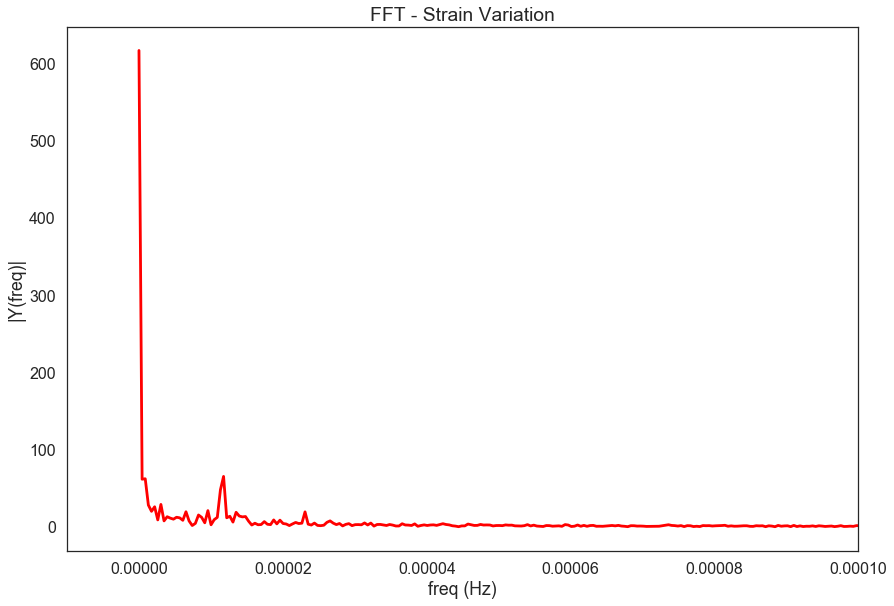

In [20]:
plt.plot(frq, abs(Y), 'r')
plt.xlim(-0.00001, 0.0001)
plt.xlabel('freq (Hz)')
plt.ylabel('|Y(freq)|')
plt.title('FFT - Strain Variation')
plt.savefig('FFT-strain')
plt.tight_layout()

In [14]:
# Plot FFT for traffic data
def apply_FFT(df):
    print(df.columns)
    print(df.head())
    signal = df['volume'].values
    print('Median volume: {:.2f}'.format(np.median(signal)))
    Fs = 1/60
    n = len(df.index)
    print('n: {}'.format(n))
    k = np.arange(n)
    T = n/Fs
    frq = k/T
    frq = frq[range(int(n/2))]
    Y = np.fft.fft(signal)/n
    Y = Y[range(int(n/2))]
    # plot_df(df)
    # plot_FFT(frq, Y)
    # dom_pos = ana_dom_signal(frq, Y)
    return frq, Y


def plot_df(df):
    plt.figure(dpi=300)
    df.plot(ax=plt.gca())
    plt.title('Yearly Traffic Variation')
    plt.savefig('Traffic_Variation')


def plot_FFT(frq, Y):
    # all
    plt.figure(dpi=300)
    plt.plot(frq, abs(Y), 'r')
    plt.xlabel('freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.title('Specturm - FULL')
    plt.savefig('Traffic_Spectrum')

    # zoom
    plt.figure(dpi=300)
    plt.plot(frq, abs(Y), 'r')
    plt.xlim(-0.00001, 0.0001)
    plt.xlabel('freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.title('Specturm - ZOOMED IN')
    plt.savefig('Traffic_Spectrum_Zoomed')


def ana_dom_signal(frq, A):
    # find dominant frequencies

    # find pos of n most dominant freq
    n = 30
    pos = A.argsort()[-n:][::-1]
    print('{} most dominant frequency (Hz):'.format(n))
    print('Freq (Hz) \t Amp')
    for p in pos:
        print('{:.10f} \t {:.3f}'.format(frq[p], A[p]))
    print('Sum of Y {:.2f}'.format(sum(A)))
    return pos


def gen_signal(df, frq, Y):
    # using 10 most dominant freqs
    A = abs(Y)
    dom_pos = ana_dom_signal(frq, A)
    n = len(df.index)
    t = np.arange(n) * 60
    signal = np.zeros(n)
    for p in dom_pos:
        signal += A[p] * np.sin(2 * np.pi * frq[p] * t)
    return signal


def gen_signal_join_df(df, sig_gen):
    print(len(df.index), len(sig_gen))
    df['gen'] = sig_gen
    print(df.head())
    return df



In [16]:
ana_dom_signal(frq, Y)

30 most dominant frequency (Hz):
Freq (Hz) 	 Amp
0.0000113225 	 47.748+3.847j
0.0000008710 	 29.174-54.914j
0.0000095805 	 16.678-12.635j
0.0000134999 	 16.492-8.952j
0.0000004355 	 15.061-59.751j
0.0000121934 	 10.938-4.081j
0.0000139353 	 9.658+10.064j
0.0000117579 	 9.405-64.513j
0.0000082741 	 9.289+12.105j
0.0000026129 	 8.918+0.108j
0.0000034838 	 7.555+1.003j
0.0000265642 	 7.308+2.205j
0.0000108870 	 7.302-9.806j
0.0000152418 	 6.864-2.171j
0.0000187256 	 6.708+5.781j
0.0000217740 	 4.007+3.959j
0.0000291771 	 3.799+1.547j
0.0000261288 	 3.562-4.562j
0.0000195966 	 2.935-8.038j
0.0000126289 	 2.901+13.314j
0.0000043548 	 2.818+10.845j
0.0000169837 	 2.797+0.797j
0.0000274352 	 2.533+1.229j
0.0000396286 	 2.387-0.625j
0.0000313545 	 2.363+4.395j
0.0000422415 	 2.262-3.298j
0.0000426770 	 2.083-2.117j
0.0000374512 	 1.995-0.853j
0.0000287416 	 1.973+2.396j
0.0000100160 	 1.904-1.744j
Sum of Y -544.55-174.21j


array([26,  2, 22, 31,  1, 28, 32, 27, 19,  6,  8, 61, 25, 35, 43, 50, 67,
       60, 45, 29, 10, 39, 63, 91, 72, 97, 98, 86, 66, 23], dtype=int64)

## Plot Traffic

In [33]:
df = pd.read_hdf('elite_sen_3.h5', 'table')
df.head()

,str_229,disp_204,tmp_265,trf_count,disp_251
timestamp,,,,,
2016-03-01 00:00:00,-685.852734,267.0557,5.310195,NaN,682.785770
2016-03-01 00:00:30,-721.518970,NaN,5.308561,NaN,679.969867
2016-03-01 00:01:00,-686.797993,NaN,5.309214,NaN,682.313533
2016-03-01 00:01:30,-672.410597,NaN,5.309719,NaN,683.238550
2016-03-01 00:02:00,-694.549303,NaN,5.302419,NaN,681.594773


In [34]:
dft = df['trf_count'].loc['2016-09-01':]
dft.head()

timestamp
2016-09-01 00:00:00    9.0
2016-09-01 00:00:30    6.0
2016-09-01 00:01:00    9.0
2016-09-01 00:01:30    6.0
2016-09-01 00:02:00    5.0
Freq: 30S, Name: trf_count, dtype: float64

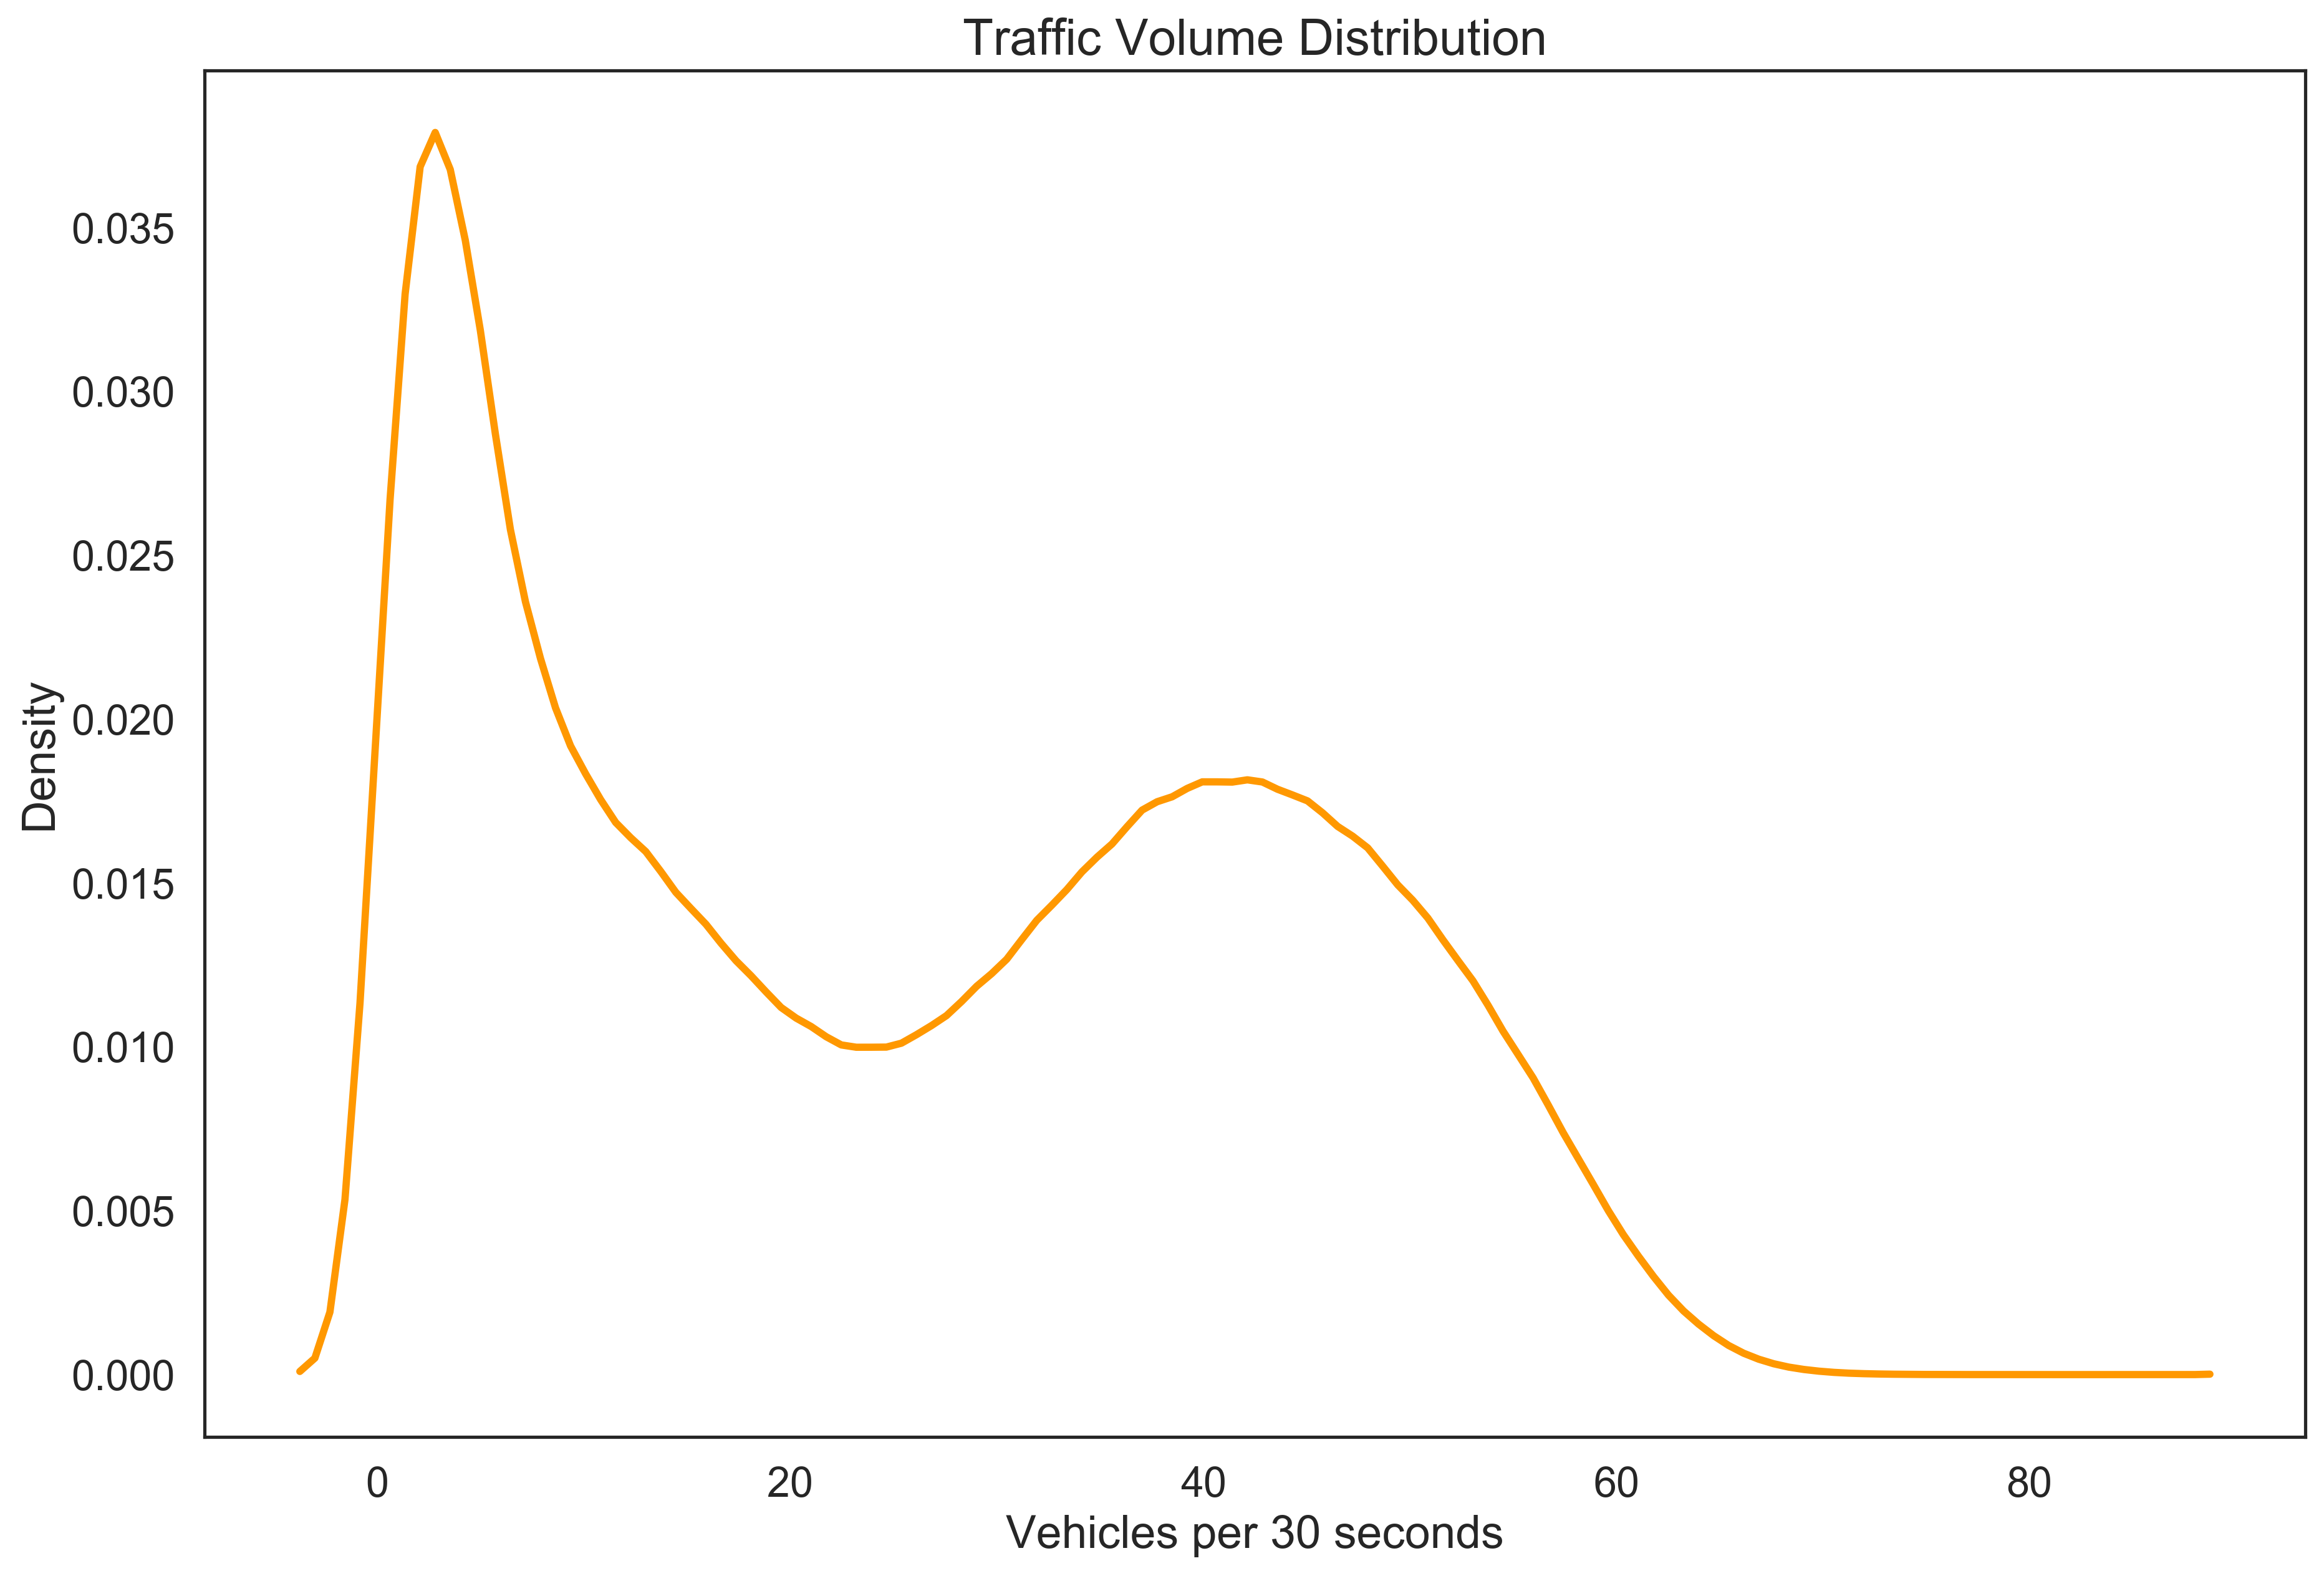

In [23]:
# plot kde

plt.figure(dpi=300)
sns.distplot(dft.dropna().values, color=c_orange, hist=False)
plt.title('Traffic Volume Distribution')
plt.xlabel('Vehicles per 30 seconds')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig('trf_kde.png')

In [27]:
import matplotlib as mpl

In [28]:
mpl.rcParams['agg.path.chunksize'] = 10000

In [37]:
dft = dft.resample('1800S').sum()

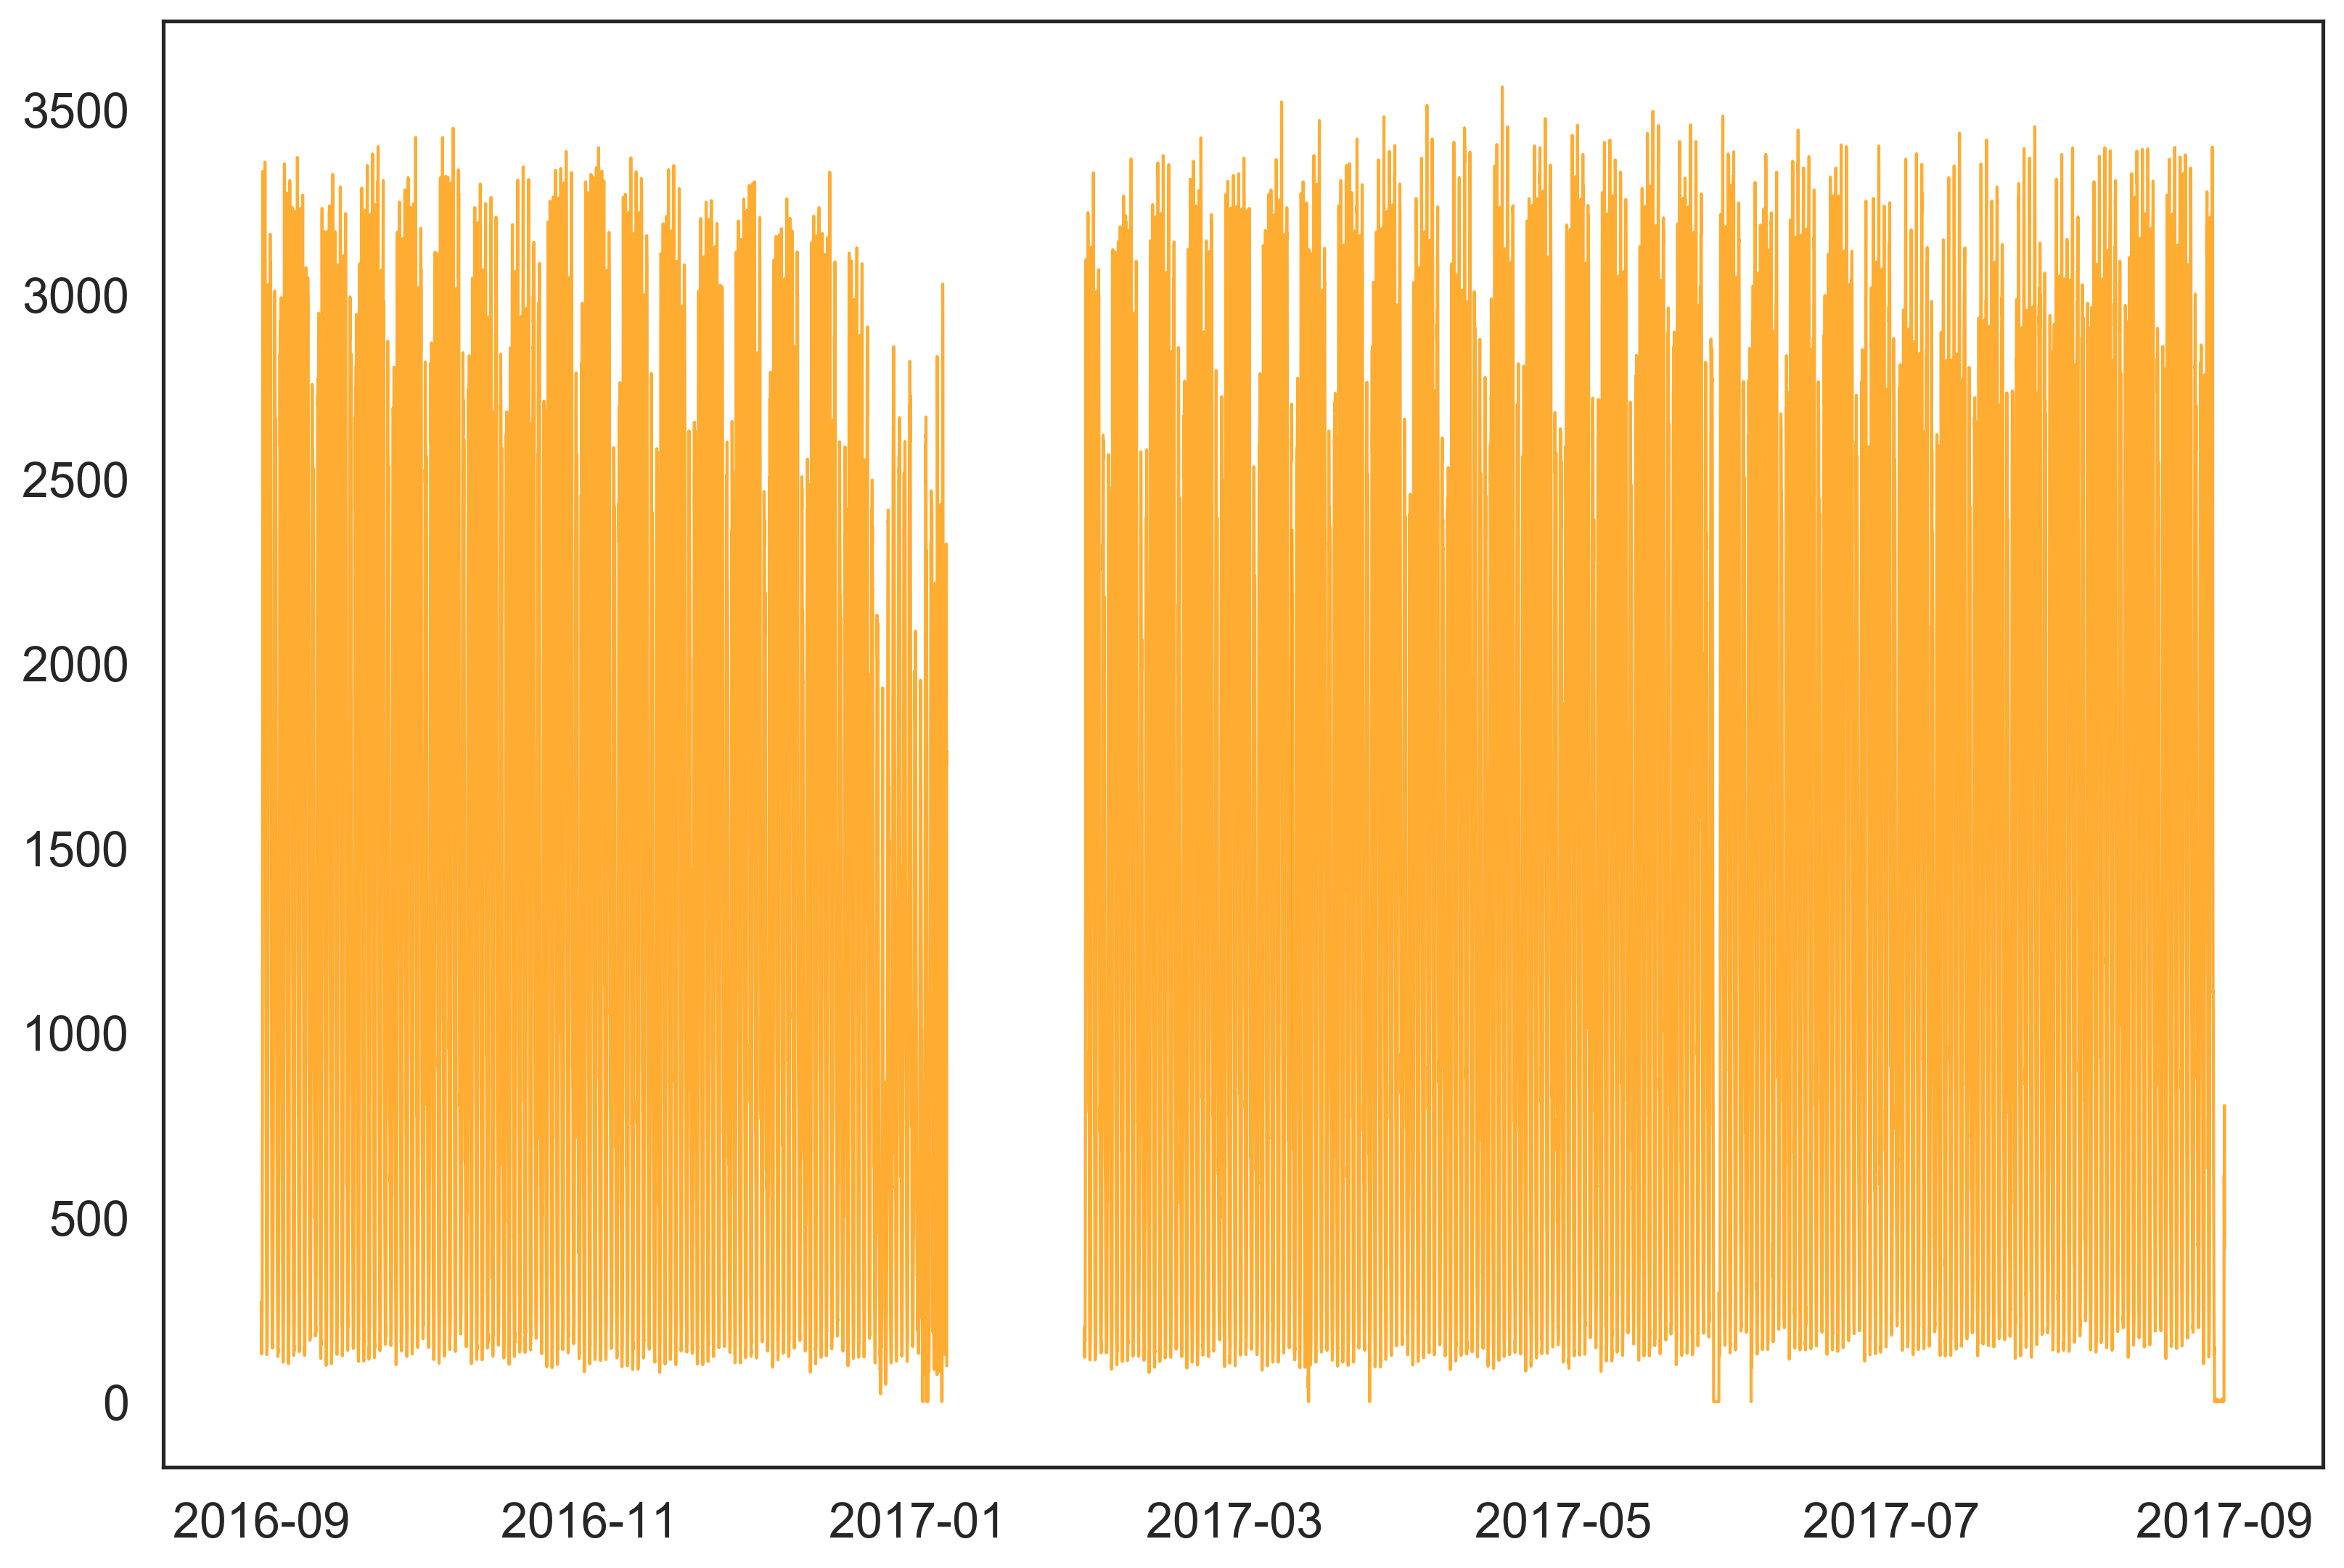

In [38]:
plt.figure(dpi=300)
plt.plot(dft, linewidth=1, color=c_orange, alpha=0.8)
plt.title('Traffic Variation')
plt.xlabel('')